In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [65]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [66]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [67]:
#download("https://github.com/AllenDowney/ThinkStats2/raw/master/solutions/chap02soln.ipynb")
#download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/chap02ex.ipynb")

## Examples from Chapter 2

In [116]:
import nsfg

In [117]:
# Read NSFG data into a Pandas DataFrame.
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1] # Live births

/workspace/python_machinelearning/nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
/workspace/python_machinelearning/nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

In [118]:
import thinkstats2
import thinkplot

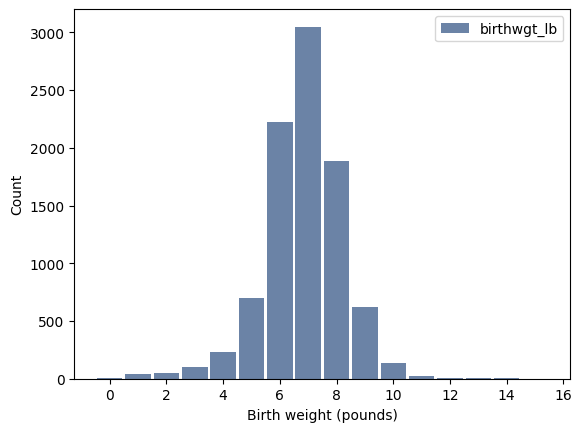

In [119]:
# Here's the histogram of birth weights in pounds using the Hist function
# Notice that Hist works with anything iterable, including a Pandas Series. 
# The label attribute appears in the legend when you plot the Hist.
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

<function matplotlib.pyplot.show(close=None, block=None)>

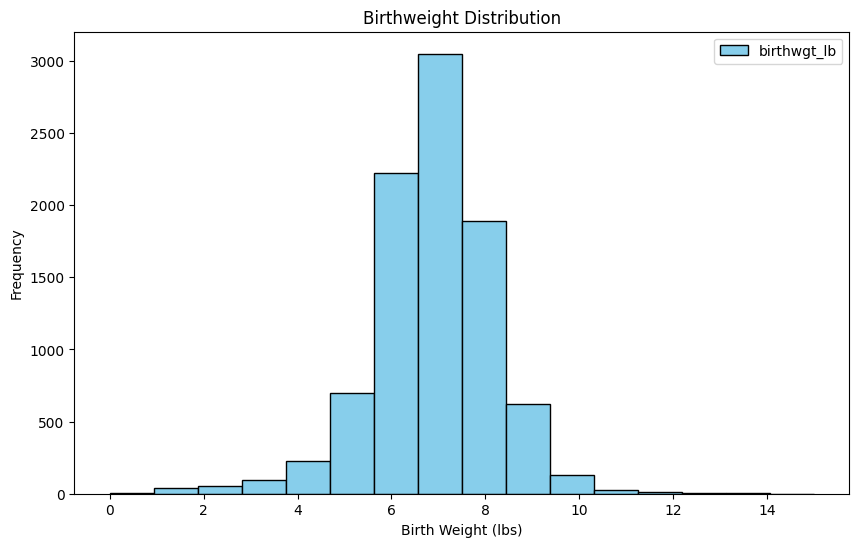

In [120]:
# Create a histogram for birthweight
birthwgt_round = np.floor(live.birthwgt_lb) # round birthweight down
bins = birthwgt_round.value_counts().sort_index().count() # calculate the number of grouped birthweights
plt.figure(figsize=(10, 6))
plt.hist(live.birthwgt_lb, bins=bins, color='skyblue', edgecolor='black', label='birthwgt_lb')
plt.title('Birthweight Distribution')
plt.xlabel('Birth Weight (lbs)')
plt.ylabel('Frequency')
plt.legend(loc='upper right') 
plt.show

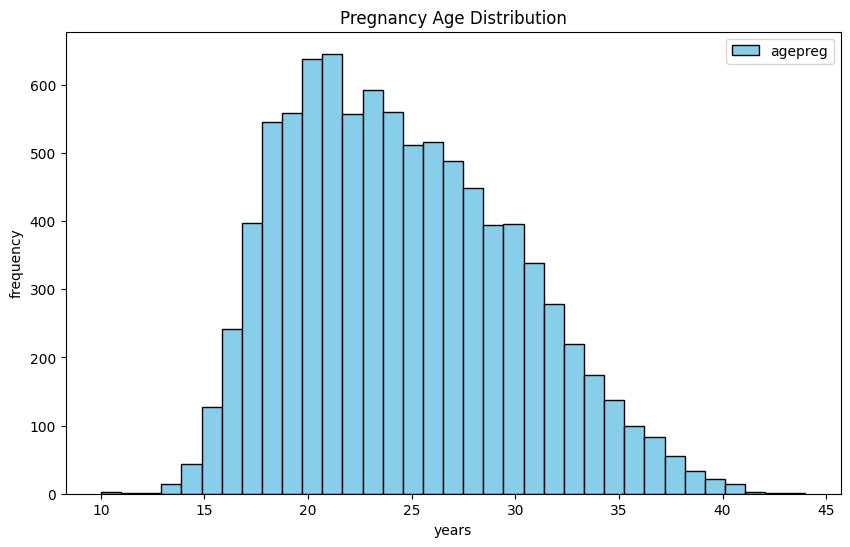

In [121]:
# Round down the age values
ages = np.floor(live.agepreg)
# print(ages.value_counts().sort_index())
bins = ages.value_counts().sort_index().count() # save count of rounded age groups for plot
plt.figure(figsize=(10,6))
plt.hist(ages, bins=bins, color='skyblue', edgecolor='black', label='agepreg')
plt.title('Pregnancy Age Distribution')
plt.xlabel('years')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()

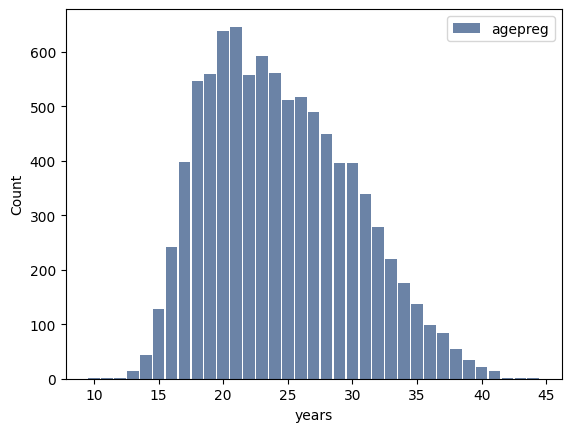

In [122]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

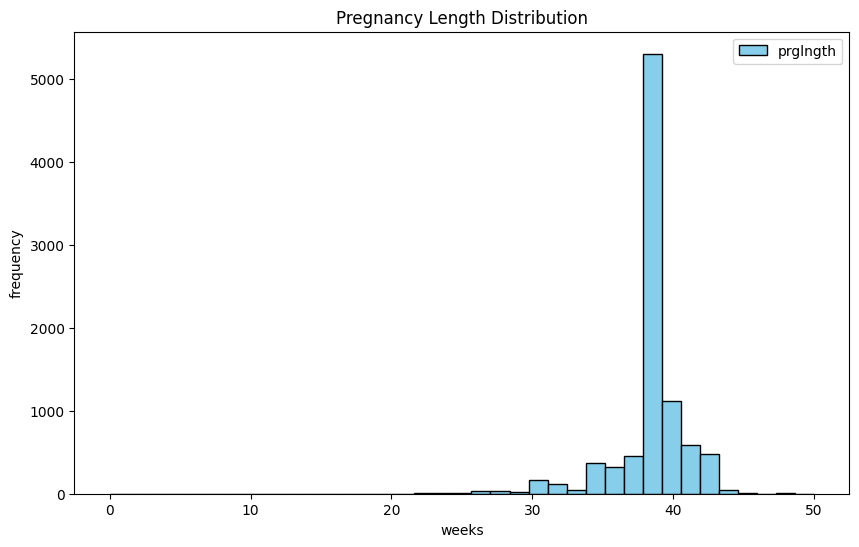

In [123]:
# plot the histogram of pregnancy lengths
bins = live.prglngth.value_counts().sort_index().count() # use count of groups as bin number for plot
plt.figure(figsize=(10,6))
hist2 = plt.hist(live.prglngth, bins=bins, color='skyblue', edgecolor='black', label='prglngth')
plt.title('Pregnancy Length Distribution')
plt.xlabel('weeks')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()

In [124]:
# Smallest pregnancy length values
print(live.prglngth.value_counts().sort_index()[0:10])

# Largest pregnancy length values
print(live.prglngth.value_counts().sort_index()[-7:])

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: count, dtype: int64
prglngth
43    148
44     46
45     10
46      1
47      1
48      7
50      2
Name: count, dtype: int64


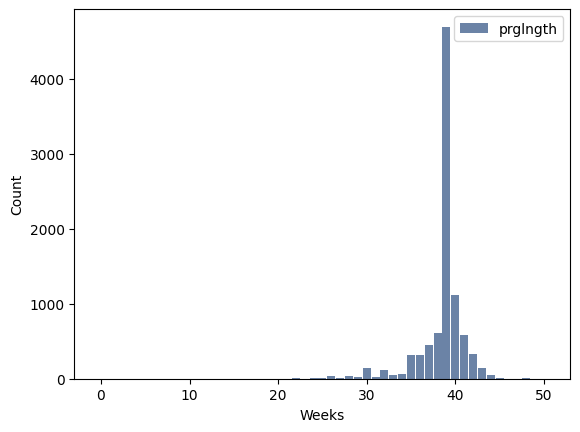

In [125]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Weeks', ylabel='Count')

In [126]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [127]:
for weeks, freq in hist.Largest(7):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

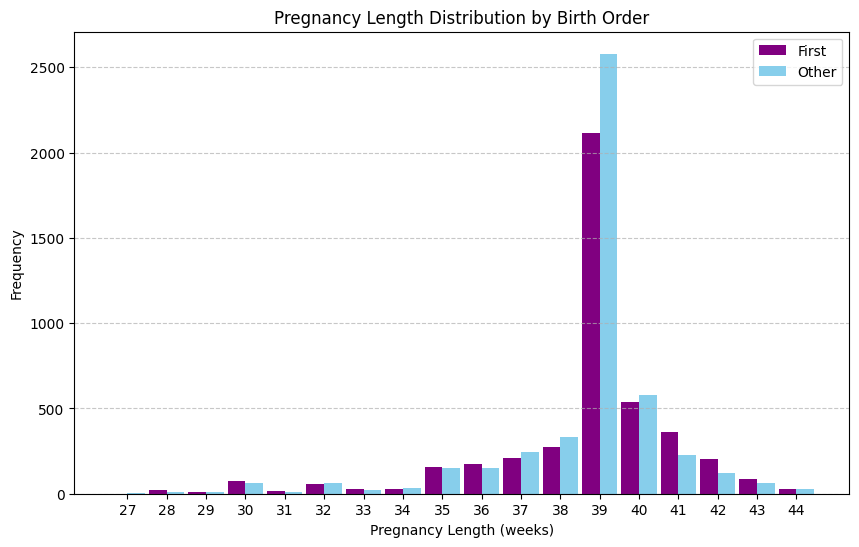

In [128]:
# Filter data for the two groups
first = live[live.birthord == 1]
other = live[live.birthord != 1]

# Define bin edges for consistency
bins = np.arange(27,46) # for pregnancy from 27 to 46 weeks

# Calculate histogram data for both groups
first_child_hist, _ = np.histogram(first.prglngth, bins=bins)
other_children_hist, _ = np.histogram(other.prglngth, bins=bins)

# Create bar positions for side-by-side plotting
bar_width = 0.45
bin_centers = bins[:-1]  # Use the left edges of bins
first_child_positions = bin_centers - bar_width / 2
other_children_positions = bin_centers + bar_width / 2

# Plot the histogram
plt.figure(figsize=(10,6))
plt.bar(first_child_positions, first_child_hist, width=bar_width, color='purple', label='First')
plt.bar(other_children_positions, other_children_hist, width=bar_width, color='skyblue', label="Other")

# Add titles and labels
plt.title('Pregnancy Length Distribution by Birth Order')
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Frequency')
plt.xticks(bin_centers, bins[:-1])  # Ensure bins are labeled correctly
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


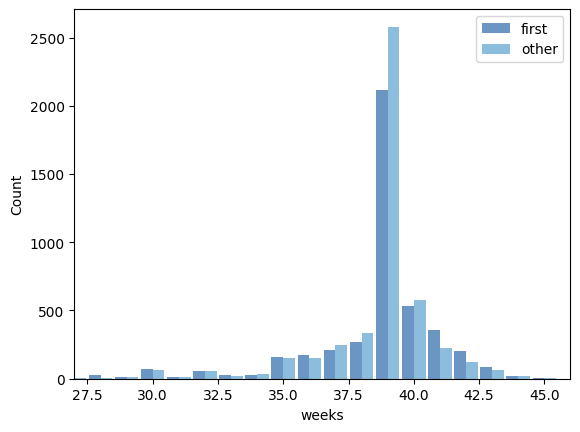

In [129]:
# Using the thinkstats and thinkplot libraries
first_hist = thinkstats2.Hist(first.prglngth, label='first')
other_hist = thinkstats2.Hist(other.prglngth, label='other')

# We can use width and align to plot two histograms side-by-side.
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

#### Summarizing Distributions
If we want to summarize the distribution with a few descriptive statistics some of the characteritics we might want to report are
- central tendency
- modes
- spread
- tails
- outliers

In [151]:
mean = live.prglngth.mean()
median = live.prglngth.median()
var = live.prglngth.var()
std = live.prglngth.std()

print(mean.round(1), std.round(1))
print(median.round(1))

38.6 2.7
39.0


In [153]:
# Here's are the mean pregnancy lengths for first babies and others:
print(first.prglngth.mean().round(3), other.prglngth.mean().round(3))

38.601 38.523


In [157]:
# And here's the difference (in weeks):
print((first.prglngth.mean() - other.prglngth.mean()).round(3)) # weeks
print(((first.prglngth.mean() - other.prglngth.mean()) * 7 * 24).round(3)) # hours

0.078
13.11


## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [17]:
preg.birthord.value_counts().sort_index()

birthord
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64

We can also use `isnull` to count the number of nans.

In [18]:
preg.birthord.isnull().sum()

np.int64(4445)

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [19]:
import pandas as pd

preglngth_counts = preg.prglngth.value_counts().sort_index()
preg_sample = preg.copy()
preglngth_max = int(preg.prglngth.max())
print(preglngth_counts)

prglngth
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64


In [20]:
# Group results by trimester
# Create bins for grouping
bins = bins = [0, 13, 26, preglngth_max]  # Define the bin edges
labels = ['1st', '2nd', '3rd']  # Define the labels for each bin

preg_sample['trimester'] = pd.cut(preg_sample['prglngth'], bins=bins, labels=labels, right=True, include_lowest=True )
grouped_counts = preg_sample.trimester.value_counts().sort_index()
print(grouped_counts)

trimester
1st    3522
2nd     793
3rd    9278
Name: count, dtype: int64


To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [21]:
preg.totalwgt_lb.mean()

np.float64(7.265628457623368)

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [22]:
preg['totalwgt_kg'] = preg['totalwgt_lb'] * 0.453592
preg.totalwgt_kg.mean()


np.float64(3.2956309433502984)

In [23]:
# Read the female respondents file and return a dataframe
resp = nsfg.ReadFemResp()

In [24]:
# Print the head of the dataframe to display the first 5 rows
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [25]:
print(resp.age_r.value_counts().sort_index())
print(resp.age_r.min())
print(resp.age_r.max())

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64
15
44


We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [26]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from preg like this:

In [27]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [28]:
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [29]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5013?

In [30]:
preg[(preg.caseid==5013) & (pregordr==1)].birthwgt_lb

5516    7.0
Name: birthwgt_lb, dtype: float64